In [42]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import pymc3 as pm
plt.style.use('ggplot')
import seaborn as sns

In [27]:
np.mean(stats.t(loc=0, scale=1, df=1).rvs(100))

-0.82711542325596654

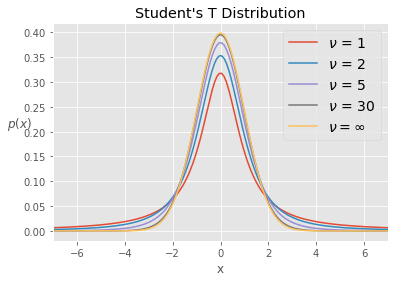

In [33]:
x_values = np.linspace(-10, 10, 200)
for df in [1, 2, 5, 30]:
    distri = stats.t(df)
    x_pdf = distri.pdf(x_values)
    plt.plot(x_values, x_pdf, label="$\\nu$ = {}".format(df))

x_pdf = stats.norm.pdf(x_values)
plt.plot(x_values, x_pdf, label="$\\nu = \\infty$")
plt.xlabel('x')
plt.ylabel('$p(x)$', rotation=0)
plt.legend(loc=0, fontsize=14)
plt.xlim(-7, 7)
plt.title('Student\'s T Distribution')

$\mu$~$Uniform(l, h)$


$\sigma$~$HalfNormal(\sigma_h)$

$\nu$~$Exponential(\lambda)$

$y$ ~ $StudentT(\mu, \sigma, \nu)$

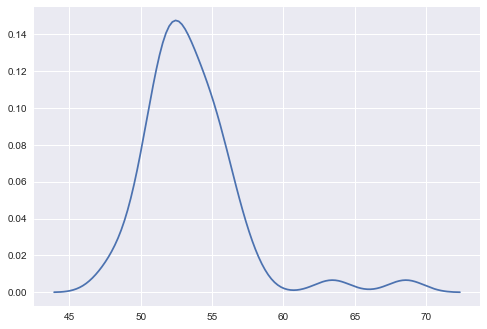

In [43]:
data = np.array([51.06, 55.12, 53.73, 50.24, 52.05, 56.40, 48.45, 52.34, 55.63, 51.49, 63.43, 53, 56.09, 51.93, 52.31, 52.33, 57.48, 57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73, 51.94, 54.95, 50.39, 52.91, 51.5, 52.68, 47.72, 49.73, 51.25, 54.99, 52.84, 53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42, 54.3, 53.84, 53.16])
sns.kdeplot(data)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -125.52: 100%|███████████████████████████████████████████████| 200000/200000 [00:15<00:00, 12873.44it/s]
Finished [100%]: Average ELBO = -125.52
100%|█████████████████████████████████████████████████████████████████████████████| 1100/1100 [00:02<00:00, 464.88it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026496305C18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000026499700278>]], dtype=object)

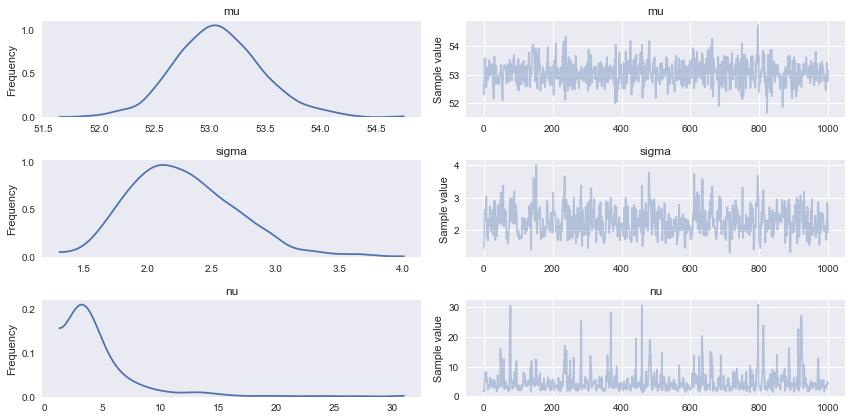

In [46]:
with pm.Model() as model_t:
    mu = pm.Uniform('mu', 40, 75)
    sigma = pm.HalfNormal('sigma', sd=10)
    nu = pm.Exponential('nu', 1/30)
    y = pm.StudentT('y', mu=mu, sd=sigma, nu=nu, observed=data)
    trace_t = pm.sample(1100)
chain_t = trace_t[100:]
pm.traceplot(chain_t)

In [45]:
pm.df_summary(chain_t)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
mu,53.060312,0.392956,0.017235,52.347946,53.892493
sigma,2.338873,0.435688,0.021787,1.582851,3.228847
nu,5.648269,5.548352,0.370367,1.457668,14.117585


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 19.90it/s]
C:\Users\hjunk\Anaconda3\lib\site-packages\matplotlib\cbook.py:2649: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


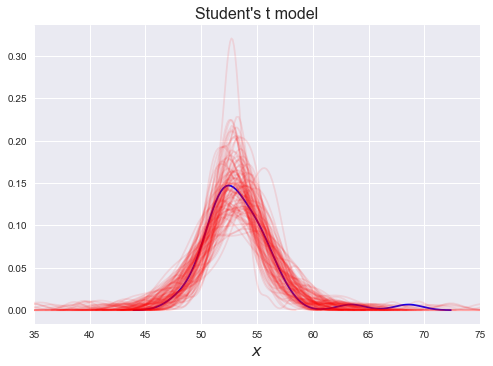

In [47]:
# posterior predictive check
y_pred = pm.sample_ppc(chain_t, 100, model_t, size=len(data))
sns.kdeplot(data, c='b')
for i in y_pred['y']:
    sns.kdeplot(i, c='r', alpha=0.1)
plt.xlim(35, 75)
plt.title("Student's t model", fontsize=16)
plt.xlabel('$x$', fontsize=16)

In [55]:
len(y_pred['y'][1])

47